<a href="https://colab.research.google.com/github/basaanithanaveenkumar/KNN-Based-Recommendation-system/blob/master/Recc_system.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Exploratory data Analysis**

In [1]:
import pandas as pd

In [2]:
ds=pd.read_csv("backup.csv")
ds

,Unnamed: 0,Name of Restaurent,Type of Cusine,Rating,Total No of Ratings,Classify,clas,Cost,Dine_in_availability,Takeaway_type,Delivery_availability,Flexiability,Dine,Take,deli,Flex,Opening_time,veg /Non- Veg,Description of the Restaurent,Location and Address,Landmark,Current Status
0,0,Las Tortas Mexican,Restaurant,4.5,287,1,NaN,Average Cost,Dine-in,Takeaway,Delivery,Flexiable,1,1,1,1,11:30AM,Non-Veg,No Description,Canvouver,3353 Cambie Street,Closed
1,1,The Story Cafe -,Restaurant,4.7,154,0,bad,Average Cost,Dine-in,Takeaway,Delivery,Flexiable,1,1,1,1,9AM,Non-Veg,No Description,Canvouver,2800 Sexsmith Road,Closed
2,2,Miku Vancouver,Sushi,4.6,4201,1,good,Expensive,DIne In Not Available,Take In Not Available,Dilivery Not Available,Not Flexiable,0,0,0,0,11:30AM,Non-Veg,Sushi & sustainable seafood are served in a so...,200 Granville St # 70 ú In the Granville Square,"Vancouver, BC, Canada",Closed
3,3,Blue Water Cafe,Seafood,4.6,1822,1,good,Too Expensive,Dine-in,Takeaway,Delivery,Flexiable,1,1,1,1,4:30PM,Non-Veg,Destination in a heritage warehouse space offe...,1095 Hamilton St ú In Urban Systems,"Vancouver, BC, Canada",Closed
4,4,Chambar Restaurant,Restaurant,4.4,2736,1,good,Expensive,Dine-in,Takeaway,Delivery,Flexiable,1,1,1,1,11:30AM,Non-Veg,Chic exposed-brick space serving creative Belg...,568 Beatty St,"Vancouver, BC, Canada",Closed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,378,Shangri-La Hotel Vancouver Drive way,Restaurent,4.0,8,0,bad,Average Cost,DIne In Not Available,Take In Not Available,Dilivery Not Available,Not Flexiable,0,0,0,0,10AM,Non-Veg,No Description,Canvouver,"Vancouver, BC, Canada",Closed
379,379,Hilton Vancouver Metrotown,Hotel,4.2,1518,1,good,Average Cost,DIne In Not Available,Take In Not Available,Dilivery Not Available,Not Flexiable,0,0,0,0,10AM,Non-Veg,Modern hotel with a heated rooftop pool & hot ...,Canvouver,"Burnaby, BC, Canada",Closed
380,380,Vancouver International Airport,Airport,4.2,4148,1,good,Average Cost,DIne In Not Available,Take In Not Available,Dilivery Not Available,Not Flexiable,0,0,0,0,10AM,Non-Veg,No Description,Canvouver,"Richmond, BC, Canada",Closed
381,381,Radisson Hotel Vancouver Airport,Hotel,4.0,841,0,bad,Average Cost,DIne In Not Available,Take In Not Available,Dilivery Not Available,Not Flexiable,0,0,0,0,10AM,Non-Veg,Polished hotel with free Wi-Fi & an airport sh...,Canvouver,"Richmond, BC, Canada",Closed


# **Import Dependencies Required**

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
ds.head(20)

,Unnamed: 0,Name of Restaurent,Type of Cusine,Rating,Total No of Ratings,Classify,clas,Cost,Dine_in_availability,Takeaway_type,Delivery_availability,Flexiability,Dine,Take,deli,Flex,Opening_time,veg /Non- Veg,Description of the Restaurent,Location and Address,Landmark,Current Status
0,0,Las Tortas Mexican,Restaurant,4.5,287,1,NaN,Average Cost,Dine-in,Takeaway,Delivery,Flexiable,1,1,1,1,11:30AM,Non-Veg,No Description,Canvouver,3353 Cambie Street,Closed
1,1,The Story Cafe -,Restaurant,4.7,154,0,bad,Average Cost,Dine-in,Takeaway,Delivery,Flexiable,1,1,1,1,9AM,Non-Veg,No Description,Canvouver,2800 Sexsmith Road,Closed
2,2,Miku Vancouver,Sushi,4.6,4201,1,good,Expensive,DIne In Not Available,Take In Not Available,Dilivery Not Available,Not Flexiable,0,0,0,0,11:30AM,Non-Veg,Sushi & sustainable seafood are served in a so...,200 Granville St # 70 ú In the Granville Square,"Vancouver, BC, Canada",Closed
3,3,Blue Water Cafe,Seafood,4.6,1822,1,good,Too Expensive,Dine-in,Takeaway,Delivery,Flexiable,1,1,1,1,4:30PM,Non-Veg,Destination in a heritage warehouse space offe...,1095 Hamilton St ú In Urban Systems,"Vancouver, BC, Canada",Closed
4,4,Chambar Restaurant,Restaurant,4.4,2736,1,good,Expensive,Dine-in,Takeaway,Delivery,Flexiable,1,1,1,1,11:30AM,Non-Veg,Chic exposed-brick space serving creative Belg...,568 Beatty St,"Vancouver, BC, Canada",Closed
5,5,Hawksworth Restaurant,Restaurant,4.4,907,1,good,Too Expensive,DIne In Not Available,Take In Not Available,Dilivery Not Available,Not Flexiable,0,0,0,0,11:30AM,Non-Veg,Inventive Pacific Northwest cuisine & extensiv...,801 W Georgia St ú In the Rosewood Hotel Georgia,"Vancouver, BC, Canada",Closed
6,6,Forage,Pacific Northwest,4.5,1250,1,good,Average Cost,Dine-in,Takeaway,Dilivery Not Available,Flexiable,1,1,0,1,4PM,Non-Veg,"Farm-to-table bistro presenting creative, area...",1300 Robson St,"Vancouver, BC, Canada",Closed
7,7,St Lawrence Restaurant,French,4.7,564,1,good,Expensive,DIne In Not Available,Take In Not Available,Dilivery Not Available,Not Flexiable,0,0,0,0,5PM,Non-Veg,Classic French dishes served for dinner in an ...,269 Powell St,"Vancouver, BC, Canada",Closed
8,8,Botanist,Pacific Northwest,4.5,729,1,good,Average Cost,DIne In Not Available,Take In Not Available,Dilivery Not Available,Not Flexiable,0,0,0,0,10AM,Non-Veg,"Airy, high-end restaurant in the Fairmont Hote...",Canvouver,1038 Canada Pl ú In the Fairmont Pacific Rim,Temporarily closed
9,9,Hy's Steakhouse & Cocktail Bar,Steak,4.5,1226,1,good,Too Expensive,DIne In Not Available,Take In Not Available,Dilivery Not Available,Not Flexiable,0,0,0,0,11:30AM,Non-Veg,Long-time posh spot for Canadian steaks & cock...,637 Hornby St ú Near the Vancouver Art Gallery,"Vancouver, BC, Canada",Closed


In [5]:
ds.shape

(383, 22)

# remove unwanted columns


In [6]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 22 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     383 non-null    int64  
 1   Name of Restaurent             383 non-null    object 
 2   Type of Cusine                 383 non-null    object 
 3   Rating                         383 non-null    float64
 4   Total No of Ratings            383 non-null    int64  
 5   Classify                       383 non-null    int64  
 6   clas                           382 non-null    object 
 7   Cost                           383 non-null    object 
 8   Dine_in_availability           383 non-null    object 
 9   Takeaway_type                  383 non-null    object 
 10  Delivery_availability          383 non-null    object 
 11  Flexiability                   383 non-null    object 
 12  Dine                           383 non-null    int

In [7]:
da=ds.drop(columns=['clas',"veg /Non- Veg","Unnamed: 0"])

In [8]:
da.to_csv("data_ba.csv")

In [9]:
da.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Name of Restaurent             383 non-null    object 
 1   Type of Cusine                 383 non-null    object 
 2   Rating                         383 non-null    float64
 3   Total No of Ratings            383 non-null    int64  
 4   Classify                       383 non-null    int64  
 5   Cost                           383 non-null    object 
 6   Dine_in_availability           383 non-null    object 
 7   Takeaway_type                  383 non-null    object 
 8   Delivery_availability          383 non-null    object 
 9   Flexiability                   383 non-null    object 
 10  Dine                           383 non-null    int64  
 11  Take                           383 non-null    int64  
 12  deli                           383 non-null    int

In [10]:
da.describe()

,Rating,Total No of Ratings,Classify,Dine,Take,deli,Flex
count,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000
mean,4.258486,966.571802,0.652742,0.357702,0.295039,0.242820,0.323760
std,0.393301,1822.310828,0.476722,0.479951,0.456657,0.429348,0.468522
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.100000,259.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.300000,638.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,4.500000,1232.500000,1.000000,1.000000,1.000000,0.000000,1.000000
max,5.000000,31717.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
v=da['Total No of Ratings']
R=da['Rating']
C=da['Rating'].mean()
m=da['Total No of Ratings'].quantile(0.70)

# **Weighted Hybrid technique for reccom_sys**

In [12]:
da['weighted_average']=((R*v)+ (C*m))/(v+m)

In [13]:
da.head(5)

,Name of Restaurent,Type of Cusine,Rating,Total No of Ratings,Classify,Cost,Dine_in_availability,Takeaway_type,Delivery_availability,Flexiability,Dine,Take,deli,Flex,Opening_time,Description of the Restaurent,Location and Address,Landmark,Current Status,weighted_average
0,Las Tortas Mexican,Restaurant,4.5,287,1,Average Cost,Dine-in,Takeaway,Delivery,Flexiable,1,1,1,1,11:30AM,No Description,Canvouver,3353 Cambie Street,Closed,4.309051
1,The Story Cafe -,Restaurant,4.7,154,0,Average Cost,Dine-in,Takeaway,Delivery,Flexiable,1,1,1,1,9AM,No Description,Canvouver,2800 Sexsmith Road,Closed,4.313416
2,Miku Vancouver,Sushi,4.6,4201,1,Expensive,DIne In Not Available,Take In Not Available,Dilivery Not Available,Not Flexiable,0,0,0,0,11:30AM,Sushi & sustainable seafood are served in a so...,200 Granville St # 70 ú In the Granville Square,"Vancouver, BC, Canada",Closed,4.529963
3,Blue Water Cafe,Seafood,4.6,1822,1,Too Expensive,Dine-in,Takeaway,Delivery,Flexiable,1,1,1,1,4:30PM,Destination in a heritage warehouse space offe...,1095 Hamilton St ú In Urban Systems,"Vancouver, BC, Canada",Closed,4.472623
4,Chambar Restaurant,Restaurant,4.4,2736,1,Expensive,Dine-in,Takeaway,Delivery,Flexiable,1,1,1,1,11:30AM,Chic exposed-brick space serving creative Belg...,568 Beatty St,"Vancouver, BC, Canada",Closed,4.359848


# Sort based on decending order for recommondation purpose


In [14]:
res_ranking=da.sort_values('weighted_average',ascending=False)
res_ranking[['Name of Restaurent ', 'Type of Cusine', 'Rating','Total No of Ratings', 'weighted_average']].head(5)

,Name of Restaurent,Type of Cusine,Rating,Total No of Ratings,weighted_average
357,Stanley Park,Park,4.8,31717,4.782107
2,Miku Vancouver,Sushi,4.6,4201,4.529963
281,Hotel Fairmont Pacific Rim,Restaurant,4.6,3592,4.520841
349,Purebread,Bakery and Cake Shop,4.7,1323,4.501183
42,Ramen DANBO,Ramen,4.6,2311,4.490971


Text(0, 0.5, 'Restaurent Name')

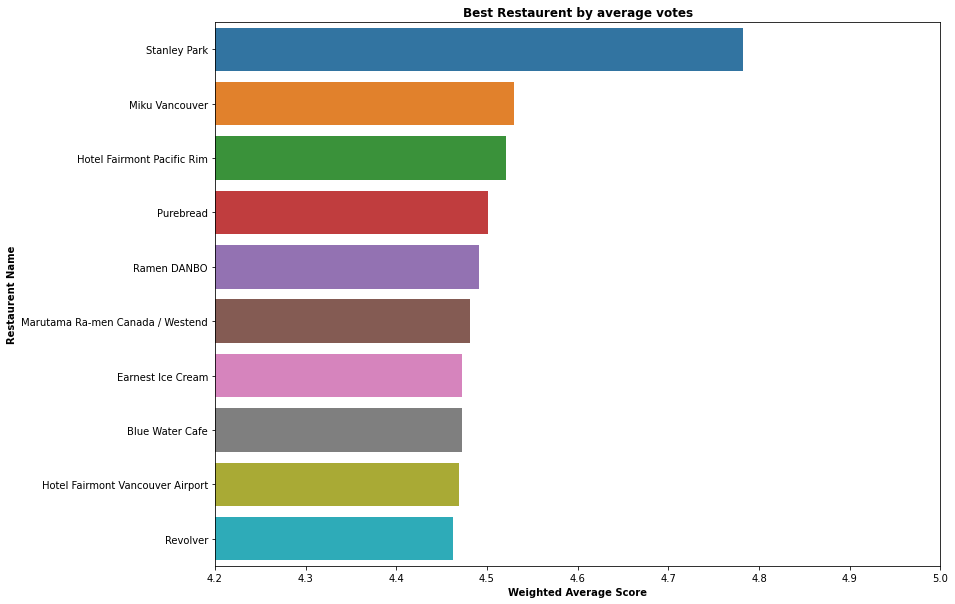

In [15]:
weight_average=res_ranking.sort_values('weighted_average',ascending=False)
plt.figure(figsize=(13,10))
axis1=sns.barplot(x=weight_average['weighted_average'].head(20), y=weight_average['Name of Restaurent '].head(10), data=weight_average)
plt.xlim(4.2, 5)
plt.title('Best Restaurent by average votes', weight='bold')
plt.xlabel('Weighted Average Score', weight='bold')
plt.ylabel('Restaurent Name', weight='bold')

Creation of another priority based of costs

In [16]:
da.Cost.unique()

array(['Average Cost', 'Expensive', 'Too Expensive', 'Not Expensive'],
      dtype=object)

In [17]:
da['cos'] = da['Cost'].replace({'Not Expensive': 5, 'Average Cost': 3, 'Expensive': 4, 'Too Expensive': 2})

In [18]:
da.head()

,Name of Restaurent,Type of Cusine,Rating,Total No of Ratings,Classify,Cost,Dine_in_availability,Takeaway_type,Delivery_availability,Flexiability,Dine,Take,deli,Flex,Opening_time,Description of the Restaurent,Location and Address,Landmark,Current Status,weighted_average,cos
0,Las Tortas Mexican,Restaurant,4.5,287,1,Average Cost,Dine-in,Takeaway,Delivery,Flexiable,1,1,1,1,11:30AM,No Description,Canvouver,3353 Cambie Street,Closed,4.309051,3
1,The Story Cafe -,Restaurant,4.7,154,0,Average Cost,Dine-in,Takeaway,Delivery,Flexiable,1,1,1,1,9AM,No Description,Canvouver,2800 Sexsmith Road,Closed,4.313416,3
2,Miku Vancouver,Sushi,4.6,4201,1,Expensive,DIne In Not Available,Take In Not Available,Dilivery Not Available,Not Flexiable,0,0,0,0,11:30AM,Sushi & sustainable seafood are served in a so...,200 Granville St # 70 ú In the Granville Square,"Vancouver, BC, Canada",Closed,4.529963,4
3,Blue Water Cafe,Seafood,4.6,1822,1,Too Expensive,Dine-in,Takeaway,Delivery,Flexiable,1,1,1,1,4:30PM,Destination in a heritage warehouse space offe...,1095 Hamilton St ú In Urban Systems,"Vancouver, BC, Canada",Closed,4.472623,2
4,Chambar Restaurant,Restaurant,4.4,2736,1,Expensive,Dine-in,Takeaway,Delivery,Flexiable,1,1,1,1,11:30AM,Chic exposed-brick space serving creative Belg...,568 Beatty St,"Vancouver, BC, Canada",Closed,4.359848,4


Text(0, 0.5, 'Name of REs')

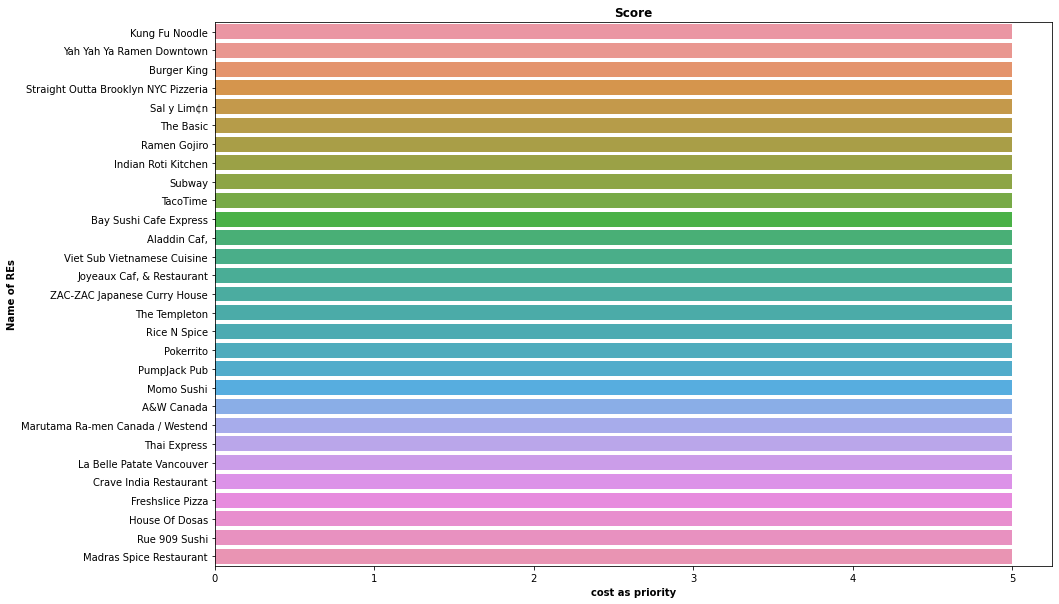

In [19]:
cos=da.sort_values('cos',ascending=False)
plt.figure(figsize=(15,10))
ax=sns.barplot(x=cos['cos'].head(31), y=cos['Name of Restaurent '].head(31), data=cos)

plt.title('Score', weight='bold')
plt.xlabel('cost as priority', weight='bold')
plt.ylabel('Name of REs', weight='bold')

# **create new recommondation score**

In [20]:
da['Recom_score'] = da["Dine"] + da["Take"]+da["deli"] + da["cos"]

In [21]:
da

,Name of Restaurent,Type of Cusine,Rating,Total No of Ratings,Classify,Cost,Dine_in_availability,Takeaway_type,Delivery_availability,Flexiability,Dine,Take,deli,Flex,Opening_time,Description of the Restaurent,Location and Address,Landmark,Current Status,weighted_average,cos,Recom_score
0,Las Tortas Mexican,Restaurant,4.5,287,1,Average Cost,Dine-in,Takeaway,Delivery,Flexiable,1,1,1,1,11:30AM,No Description,Canvouver,3353 Cambie Street,Closed,4.309051,3,6
1,The Story Cafe -,Restaurant,4.7,154,0,Average Cost,Dine-in,Takeaway,Delivery,Flexiable,1,1,1,1,9AM,No Description,Canvouver,2800 Sexsmith Road,Closed,4.313416,3,6
2,Miku Vancouver,Sushi,4.6,4201,1,Expensive,DIne In Not Available,Take In Not Available,Dilivery Not Available,Not Flexiable,0,0,0,0,11:30AM,Sushi & sustainable seafood are served in a so...,200 Granville St # 70 ú In the Granville Square,"Vancouver, BC, Canada",Closed,4.529963,4,4
3,Blue Water Cafe,Seafood,4.6,1822,1,Too Expensive,Dine-in,Takeaway,Delivery,Flexiable,1,1,1,1,4:30PM,Destination in a heritage warehouse space offe...,1095 Hamilton St ú In Urban Systems,"Vancouver, BC, Canada",Closed,4.472623,2,5
4,Chambar Restaurant,Restaurant,4.4,2736,1,Expensive,Dine-in,Takeaway,Delivery,Flexiable,1,1,1,1,11:30AM,Chic exposed-brick space serving creative Belg...,568 Beatty St,"Vancouver, BC, Canada",Closed,4.359848,4,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,Shangri-La Hotel Vancouver Drive way,Restaurent,4.0,8,0,Average Cost,DIne In Not Available,Take In Not Available,Dilivery Not Available,Not Flexiable,0,0,0,0,10AM,No Description,Canvouver,"Vancouver, BC, Canada",Closed,4.256592,3,3
379,Hilton Vancouver Metrotown,Hotel,4.2,1518,1,Average Cost,DIne In Not Available,Take In Not Available,Dilivery Not Available,Not Flexiable,0,0,0,0,10AM,Modern hotel with a heated rooftop pool & hot ...,Canvouver,"Burnaby, BC, Canada",Closed,4.224363,3,3
380,Vancouver International Airport,Airport,4.2,4148,1,Average Cost,DIne In Not Available,Take In Not Available,Dilivery Not Available,Not Flexiable,0,0,0,0,10AM,No Description,Canvouver,"Richmond, BC, Canada",Closed,4.212116,3,3
381,Radisson Hotel Vancouver Airport,Hotel,4.0,841,0,Average Cost,DIne In Not Available,Take In Not Available,Dilivery Not Available,Not Flexiable,0,0,0,0,10AM,Polished hotel with free Wi-Fi & an airport sh...,Canvouver,"Richmond, BC, Canada",Closed,4.145546,3,3


Text(0, 0.5, 'Name of Restaurent')

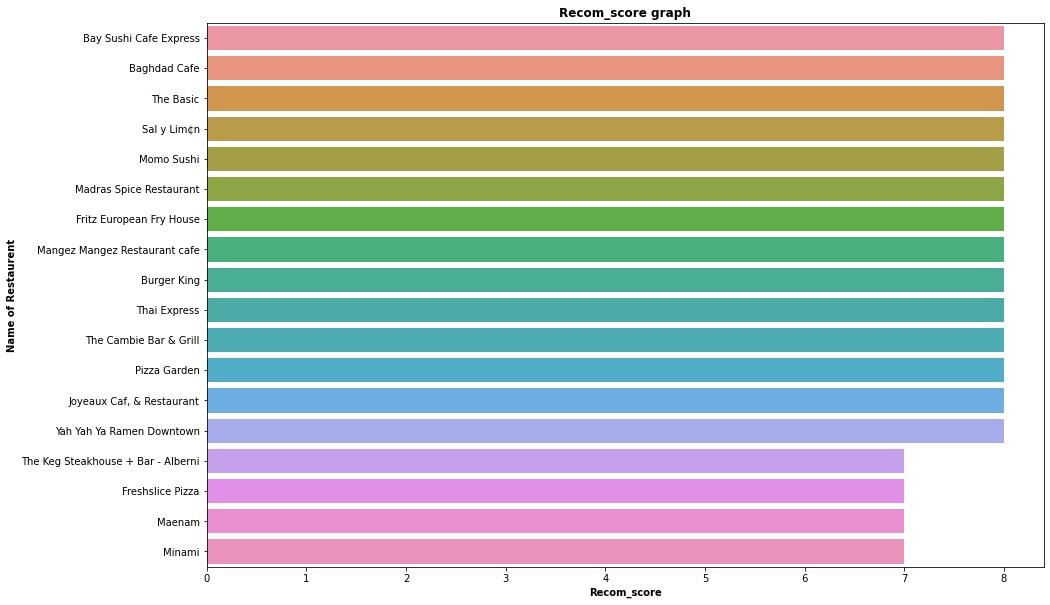

In [22]:
Recom_score=da.sort_values('Recom_score',ascending=False)
plt.figure(figsize=(15,10))
ax=sns.barplot(x=Recom_score['Recom_score'].head(31), y=Recom_score['Name of Restaurent '].head(18), data=Recom_score)

plt.title('Recom_score graph', weight='bold')
plt.xlabel('Recom_score', weight='bold')
plt.ylabel('Name of Restaurent', weight='bold')

In [23]:
da['score'] = da['Recom_score'] * 0.1 + da['weighted_average'] * 0.75+da['cos']*0.15
ds = da.sort_values(['score'], ascending=False)
ds[['Name of Restaurent ','score','Type of Cusine', 'Rating','Total No of Ratings', 'weighted_average','Recom_score','cos']].head(20)

,Name of Restaurent,score,Type of Cusine,Rating,Total No of Ratings,weighted_average,Recom_score,cos
100,Sal y Lim¢n,4.883318,Mexican,4.5,3626,4.444424,8,5
99,The Basic,4.790670,Breakfast,4.4,855,4.320893,8,5
203,Pizza Garden,4.781317,Pizza,4.4,591,4.308423,8,5
159,Fritz European Fry House,4.758617,Fast Food,4.3,976,4.278156,8,5
161,Mangez Mangez Restaurant cafe,4.755375,Restaurant,4.6,51,4.273834,8,5
204,Baghdad Cafe,4.754596,Middle Eastern,4.3,570,4.272794,8,5
72,The Templeton,4.746247,Diner,4.5,1409,4.394996,7,5
182,Joyeaux Caf‚ & Restaurant,4.728746,Vietnamese,4.2,570,4.238328,8,5
130,Madras Spice Restaurant,4.727547,Indian,4.2,642,4.236729,8,5
274,Yah Yah Ya Ramen Downtown,4.726756,Ramen,4.2,693,4.235675,8,5


In [24]:
da.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Name of Restaurent             383 non-null    object 
 1   Type of Cusine                 383 non-null    object 
 2   Rating                         383 non-null    float64
 3   Total No of Ratings            383 non-null    int64  
 4   Classify                       383 non-null    int64  
 5   Cost                           383 non-null    object 
 6   Dine_in_availability           383 non-null    object 
 7   Takeaway_type                  383 non-null    object 
 8   Delivery_availability          383 non-null    object 
 9   Flexiability                   383 non-null    object 
 10  Dine                           383 non-null    int64  
 11  Take                           383 non-null    int64  
 12  deli                           383 non-null    int

Text(0, 0.5, 'Restaurent Title')

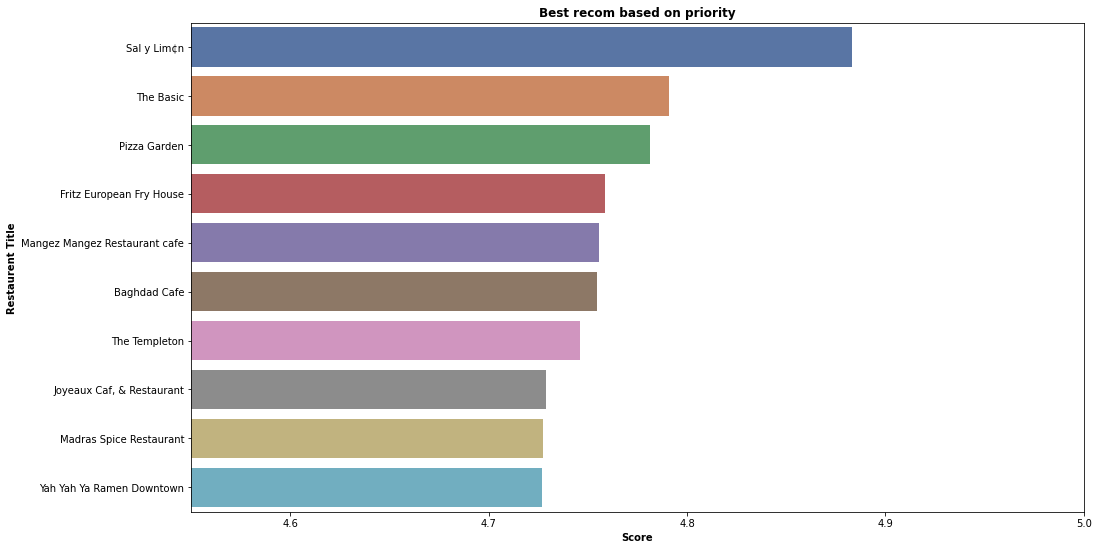

In [25]:
scored_df = da.sort_values('score', ascending=False)

plt.figure(figsize=(16,9))

ax = sns.barplot(x=scored_df['score'].head(10), y=scored_df['Name of Restaurent '].head(10), data=scored_df, palette='deep')

plt.xlim(4.55, 5)
plt.title('Best recom based on priority', weight='bold')
plt.xlabel('Score', weight='bold')
plt.ylabel('Restaurent Title', weight='bold')

## **content Based Recommondation system using NLP**

In [26]:
ds=pd.read_csv("backup.csv")
ds

,Unnamed: 0,Name of Restaurent,Type of Cusine,Rating,Total No of Ratings,Classify,clas,Cost,Dine_in_availability,Takeaway_type,Delivery_availability,Flexiability,Dine,Take,deli,Flex,Opening_time,veg /Non- Veg,Description of the Restaurent,Location and Address,Landmark,Current Status
0,0,Las Tortas Mexican,Restaurant,4.5,287,1,NaN,Average Cost,Dine-in,Takeaway,Delivery,Flexiable,1,1,1,1,11:30AM,Non-Veg,No Description,Canvouver,3353 Cambie Street,Closed
1,1,The Story Cafe -,Restaurant,4.7,154,0,bad,Average Cost,Dine-in,Takeaway,Delivery,Flexiable,1,1,1,1,9AM,Non-Veg,No Description,Canvouver,2800 Sexsmith Road,Closed
2,2,Miku Vancouver,Sushi,4.6,4201,1,good,Expensive,DIne In Not Available,Take In Not Available,Dilivery Not Available,Not Flexiable,0,0,0,0,11:30AM,Non-Veg,Sushi & sustainable seafood are served in a so...,200 Granville St # 70 ú In the Granville Square,"Vancouver, BC, Canada",Closed
3,3,Blue Water Cafe,Seafood,4.6,1822,1,good,Too Expensive,Dine-in,Takeaway,Delivery,Flexiable,1,1,1,1,4:30PM,Non-Veg,Destination in a heritage warehouse space offe...,1095 Hamilton St ú In Urban Systems,"Vancouver, BC, Canada",Closed
4,4,Chambar Restaurant,Restaurant,4.4,2736,1,good,Expensive,Dine-in,Takeaway,Delivery,Flexiable,1,1,1,1,11:30AM,Non-Veg,Chic exposed-brick space serving creative Belg...,568 Beatty St,"Vancouver, BC, Canada",Closed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,378,Shangri-La Hotel Vancouver Drive way,Restaurent,4.0,8,0,bad,Average Cost,DIne In Not Available,Take In Not Available,Dilivery Not Available,Not Flexiable,0,0,0,0,10AM,Non-Veg,No Description,Canvouver,"Vancouver, BC, Canada",Closed
379,379,Hilton Vancouver Metrotown,Hotel,4.2,1518,1,good,Average Cost,DIne In Not Available,Take In Not Available,Dilivery Not Available,Not Flexiable,0,0,0,0,10AM,Non-Veg,Modern hotel with a heated rooftop pool & hot ...,Canvouver,"Burnaby, BC, Canada",Closed
380,380,Vancouver International Airport,Airport,4.2,4148,1,good,Average Cost,DIne In Not Available,Take In Not Available,Dilivery Not Available,Not Flexiable,0,0,0,0,10AM,Non-Veg,No Description,Canvouver,"Richmond, BC, Canada",Closed
381,381,Radisson Hotel Vancouver Airport,Hotel,4.0,841,0,bad,Average Cost,DIne In Not Available,Take In Not Available,Dilivery Not Available,Not Flexiable,0,0,0,0,10AM,Non-Veg,Polished hotel with free Wi-Fi & an airport sh...,Canvouver,"Richmond, BC, Canada",Closed


In [27]:
da.head(5)

,Name of Restaurent,Type of Cusine,Rating,Total No of Ratings,Classify,Cost,Dine_in_availability,Takeaway_type,Delivery_availability,Flexiability,Dine,Take,deli,Flex,Opening_time,Description of the Restaurent,Location and Address,Landmark,Current Status,weighted_average,cos,Recom_score,score
0,Las Tortas Mexican,Restaurant,4.5,287,1,Average Cost,Dine-in,Takeaway,Delivery,Flexiable,1,1,1,1,11:30AM,No Description,Canvouver,3353 Cambie Street,Closed,4.309051,3,6,4.281788
1,The Story Cafe -,Restaurant,4.7,154,0,Average Cost,Dine-in,Takeaway,Delivery,Flexiable,1,1,1,1,9AM,No Description,Canvouver,2800 Sexsmith Road,Closed,4.313416,3,6,4.285062
2,Miku Vancouver,Sushi,4.6,4201,1,Expensive,DIne In Not Available,Take In Not Available,Dilivery Not Available,Not Flexiable,0,0,0,0,11:30AM,Sushi & sustainable seafood are served in a so...,200 Granville St # 70 ú In the Granville Square,"Vancouver, BC, Canada",Closed,4.529963,4,4,4.397472
3,Blue Water Cafe,Seafood,4.6,1822,1,Too Expensive,Dine-in,Takeaway,Delivery,Flexiable,1,1,1,1,4:30PM,Destination in a heritage warehouse space offe...,1095 Hamilton St ú In Urban Systems,"Vancouver, BC, Canada",Closed,4.472623,2,5,4.154467
4,Chambar Restaurant,Restaurant,4.4,2736,1,Expensive,Dine-in,Takeaway,Delivery,Flexiable,1,1,1,1,11:30AM,Chic exposed-brick space serving creative Belg...,568 Beatty St,"Vancouver, BC, Canada",Closed,4.359848,4,7,4.569886


In [28]:
ds.head()['Cost']

0     Average Cost
1     Average Cost
2        Expensive
3    Too Expensive
4        Expensive
Name: Cost, dtype: object

In [64]:
from sklearn.metrics.pairwise import sigmoid_kernel

# Compute the sigmoid kernel
sig = sigmoid_kernel(tfv_matrix, tfv_matrix)

In [65]:
from sklearn.feature_extraction.text import TfidfVectorizer


tfv = TfidfVectorizer(min_df=3,  max_features=None, 
            strip_accents='unicode', analyzer='word',token_pattern=r'\w{1,}',
            ngram_range=(1, 3),
            stop_words = 'english')

# Filling NaNs with empty string
ds['Cost'] = ds['Cost'].fillna('')

In [66]:
tfv_matrix = tfv.fit_transform(ds['Cost'])

In [67]:
indi = pd.Series(ds.index, index=ds['Name of Restaurent '])

In [68]:
indi

Name of Restaurent 
Las Tortas Mexican                                                    0  
The Story Cafe -                                                      1  
Miku Vancouver                                                        2  
Blue Water Cafe                                                       3  
Chambar Restaurant                                                    4  
Hawksworth Restaurant                                                 5  
Forage                                                                6  
St Lawrence Restaurant                                                7  
Botanist                                                              8  
Hy's Steakhouse & Cocktail Bar                                        9  
Bao Bei                                                               10 
Cioppino's Mediterranean Grill                                        11 
The Acorn Restaurant                                                  12 
Au Comptoir       

In [69]:
def give_rec(title, sig=sig):
    # Get the index corresponding to original_title
    idx = indi[title]

    # Get the pairwsie similarity scores 
    sig_scores = list(enumerate(sig[idx]))

    # Sort the movies 
    sig_scores = sorted(sig_scores, key=lambda x: x[1], reverse=True)

    # Scores of the 10 most similar movies
    sig_scores = sig_scores[1:11]

    # Movie indices
    res_indi = [i[0] for i in sig_scores]

    # Top 10 most similar movies
    return ds['Name of Restaurent '].iloc[res_indi]

In [70]:
give_rec('Las Tortas Mexican')

1      The Story Cafe -                     
23     Northern Cafe                        
42     Ramen DANBO                          
48     MeeT in Gastown                      
49     Rocky Mountain Flatbread, Main Street
56     Jam Cafe Kitsilano                   
80     East is East                         
99     The Basic                            
103    MeeT in Yaletown                     
121    Aleph Eatery                         
Name: Name of Restaurent , dtype: object

In [52]:
give_rec('Forage')

229              Honey Salt
195        Cavo Bar+Kitchen
34            Fable Kitchen
155     Mosaic Grille & Bar
69      Twisted Fork Bistro
4        Chambar Restaurant
329                 Bar One
62       Les Faux Bourgeois
247               Sala Thai
210    Holts Caf‚ Vancouver
Name: Name of Restaurent , dtype: object

In [53]:
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_colwidth', -1)

In [54]:
ds[['Name of Restaurent ','Cost']].head(60)

,Name of Restaurent,Cost
0,Las Tortas Mexican,Average Cost
1,The Story Cafe -,Average Cost
2,Miku Vancouver,Expensive
3,Blue Water Cafe,Too Expensive
4,Chambar Restaurant,Expensive
5,Hawksworth Restaurant,Too Expensive
6,Forage,Average Cost
7,St Lawrence Restaurant,Expensive
8,Botanist,Average Cost
9,Hy's Steakhouse & Cocktail Bar,Too Expensive


In [56]:
from sklearn.feature_extraction.text import TfidfVectorizer


tfv = TfidfVectorizer(min_df=3,  max_features=None, 
            strip_accents='unicode', analyzer='word',token_pattern=r'\w{1,}',
            ngram_range=(1, 3),
            stop_words = 'english')

# Filling NaNs with empty string
ds['Description of the Restaurent'] = ds['Description of the Restaurent'].fillna('')

In [57]:
tfv_matrix = tfv.fit_transform(ds['Description of the Restaurent'])

In [58]:
from sklearn.metrics.pairwise import sigmoid_kernel

# Compute the sigmoid kernel
sig = sigmoid_kernel(tfv_matrix, tfv_matrix)

In [59]:
indi = pd.Series(ds.index, index=ds['Name of Restaurent '])

In [60]:
indi

Name of Restaurent 
Las Tortas Mexican                                                    0  
The Story Cafe -                                                      1  
Miku Vancouver                                                        2  
Blue Water Cafe                                                       3  
Chambar Restaurant                                                    4  
Hawksworth Restaurant                                                 5  
Forage                                                                6  
St Lawrence Restaurant                                                7  
Botanist                                                              8  
Hy's Steakhouse & Cocktail Bar                                        9  
Bao Bei                                                               10 
Cioppino's Mediterranean Grill                                        11 
The Acorn Restaurant                                                  12 
Au Comptoir       

In [61]:
def give_rec(title, sig=sig):
    # Get the index corresponding to original_title
    idx = indi[title]

    # Get the pairwsie similarity scores 
    sig_scores = list(enumerate(sig[idx]))

    # Sort the movies 
    sig_scores = sorted(sig_scores, key=lambda x: x[1], reverse=True)

    # Scores of the 10 most similar movies
    sig_scores = sig_scores[1:11]

    # Movie indices
    res_indi = [i[0] for i in sig_scores]

    # Top 10 most similar movies
    return ds['Name of Restaurent '].iloc[res_indi]

In [62]:
ds[['Name of Restaurent ','Description of the Restaurent']].head(60)

,Name of Restaurent,Description of the Restaurent
0,Las Tortas Mexican,No Description
1,The Story Cafe -,No Description
2,Miku Vancouver,Sushi & sustainable seafood are served in a sophisticated setting with a patio & water views.
3,Blue Water Cafe,Destination in a heritage warehouse space offering sustainable seafood with innovative touches.
4,Chambar Restaurant,"Chic exposed-brick space serving creative Belgian cuisine & sustainable seafood, plus beer & wine."
5,Hawksworth Restaurant,Inventive Pacific Northwest cuisine & extensive wine list served in the Rosewood Hotel Georgia.
6,Forage,"Farm-to-table bistro presenting creative, area-sourced plates, plus local beer & wine on tap."
7,St Lawrence Restaurant,"Classic French dishes served for dinner in an intimate, casually elegant setting."
8,Botanist,"Airy, high-end restaurant in the Fairmont Hotel offering modern Canadian cuisine, wine & cocktails."
9,Hy's Steakhouse & Cocktail Bar,Long-time posh spot for Canadian steaks & cocktails in a traditional wood-paneled setting.


In [63]:
give_rec('Miku Vancouver')

17     Ancora Waterfront Dining and Patio - False Creek
376    Glo Restaurant + Lounge                         
116    Showcase Restaurant & Bar                       
3      Blue Water Cafe                                 
168    The Boathouse Restaurant                        
4      Chambar Restaurant                              
57     delhi6 Indian bistro                            
257    Oceans 999                                      
65     Seasons in the Park                             
347    Altitudes Bistro                                
Name: Name of Restaurent , dtype: object

In [42]:
ds.head(40)

,Unnamed: 0,Name of Restaurent,Type of Cusine,Rating,Total No of Ratings,Classify,clas,Cost,Dine_in_availability,Takeaway_type,Delivery_availability,Flexiability,Dine,Take,deli,Flex,Opening_time,veg /Non- Veg,Description of the Restaurent,Location and Address,Landmark,Current Status
0,0,Las Tortas Mexican,Restaurant,4.5,287,1,NaN,Average Cost,Dine-in,Takeaway,Delivery,Flexiable,1,1,1,1,11:30AM,Non-Veg,No Description,Canvouver,3353 Cambie Street,Closed
1,1,The Story Cafe -,Restaurant,4.7,154,0,bad,Average Cost,Dine-in,Takeaway,Delivery,Flexiable,1,1,1,1,9AM,Non-Veg,No Description,Canvouver,2800 Sexsmith Road,Closed
2,2,Miku Vancouver,Sushi,4.6,4201,1,good,Expensive,DIne In Not Available,Take In Not Available,Dilivery Not Available,Not Flexiable,0,0,0,0,11:30AM,Non-Veg,Sushi & sustainable seafood are served in a so...,200 Granville St # 70 ú In the Granville Square,"Vancouver, BC, Canada",Closed
3,3,Blue Water Cafe,Seafood,4.6,1822,1,good,Too Expensive,Dine-in,Takeaway,Delivery,Flexiable,1,1,1,1,4:30PM,Non-Veg,Destination in a heritage warehouse space offe...,1095 Hamilton St ú In Urban Systems,"Vancouver, BC, Canada",Closed
4,4,Chambar Restaurant,Restaurant,4.4,2736,1,good,Expensive,Dine-in,Takeaway,Delivery,Flexiable,1,1,1,1,11:30AM,Non-Veg,Chic exposed-brick space serving creative Belg...,568 Beatty St,"Vancouver, BC, Canada",Closed
5,5,Hawksworth Restaurant,Restaurant,4.4,907,1,good,Too Expensive,DIne In Not Available,Take In Not Available,Dilivery Not Available,Not Flexiable,0,0,0,0,11:30AM,Non-Veg,Inventive Pacific Northwest cuisine & extensiv...,801 W Georgia St ú In the Rosewood Hotel Georgia,"Vancouver, BC, Canada",Closed
6,6,Forage,Pacific Northwest,4.5,1250,1,good,Average Cost,Dine-in,Takeaway,Dilivery Not Available,Flexiable,1,1,0,1,4PM,Non-Veg,"Farm-to-table bistro presenting creative, area...",1300 Robson St,"Vancouver, BC, Canada",Closed
7,7,St Lawrence Restaurant,French,4.7,564,1,good,Expensive,DIne In Not Available,Take In Not Available,Dilivery Not Available,Not Flexiable,0,0,0,0,5PM,Non-Veg,Classic French dishes served for dinner in an ...,269 Powell St,"Vancouver, BC, Canada",Closed
8,8,Botanist,Pacific Northwest,4.5,729,1,good,Average Cost,DIne In Not Available,Take In Not Available,Dilivery Not Available,Not Flexiable,0,0,0,0,10AM,Non-Veg,"Airy, high-end restaurant in the Fairmont Hote...",Canvouver,1038 Canada Pl ú In the Fairmont Pacific Rim,Temporarily closed
9,9,Hy's Steakhouse & Cocktail Bar,Steak,4.5,1226,1,good,Too Expensive,DIne In Not Available,Take In Not Available,Dilivery Not Available,Not Flexiable,0,0,0,0,11:30AM,Non-Veg,Long-time posh spot for Canadian steaks & cock...,637 Hornby St ú Near the Vancouver Art Gallery,"Vancouver, BC, Canada",Closed


In [43]:
fd=pd.read_csv('data_ba.csv')

In [44]:
fd.head(20)

,Unnamed: 0,Name of Restaurent,Type of Cusine,Rating,Total No of Ratings,Classify,Cost,Dine_in_availability,Takeaway_type,Delivery_availability,Flexiability,Dine,Take,deli,Flex,Opening_time,Description of the Restaurent,Location and Address,Landmark,Current Status
0,0,Las Tortas Mexican,Restaurant,4.5,287,1,Average Cost,Dine-in,Takeaway,Delivery,Flexiable,1,1,1,1,11:30AM,No Description,Canvouver,3353 Cambie Street,Closed
1,1,The Story Cafe -,Restaurant,4.7,154,0,Average Cost,Dine-in,Takeaway,Delivery,Flexiable,1,1,1,1,9AM,No Description,Canvouver,2800 Sexsmith Road,Closed
2,2,Miku Vancouver,Sushi,4.6,4201,1,Expensive,DIne In Not Available,Take In Not Available,Dilivery Not Available,Not Flexiable,0,0,0,0,11:30AM,Sushi & sustainable seafood are served in a so...,200 Granville St # 70 ú In the Granville Square,"Vancouver, BC, Canada",Closed
3,3,Blue Water Cafe,Seafood,4.6,1822,1,Too Expensive,Dine-in,Takeaway,Delivery,Flexiable,1,1,1,1,4:30PM,Destination in a heritage warehouse space offe...,1095 Hamilton St ú In Urban Systems,"Vancouver, BC, Canada",Closed
4,4,Chambar Restaurant,Restaurant,4.4,2736,1,Expensive,Dine-in,Takeaway,Delivery,Flexiable,1,1,1,1,11:30AM,Chic exposed-brick space serving creative Belg...,568 Beatty St,"Vancouver, BC, Canada",Closed
5,5,Hawksworth Restaurant,Restaurant,4.4,907,1,Too Expensive,DIne In Not Available,Take In Not Available,Dilivery Not Available,Not Flexiable,0,0,0,0,11:30AM,Inventive Pacific Northwest cuisine & extensiv...,801 W Georgia St ú In the Rosewood Hotel Georgia,"Vancouver, BC, Canada",Closed
6,6,Forage,Pacific Northwest,4.5,1250,1,Average Cost,Dine-in,Takeaway,Dilivery Not Available,Flexiable,1,1,0,1,4PM,"Farm-to-table bistro presenting creative, area...",1300 Robson St,"Vancouver, BC, Canada",Closed
7,7,St Lawrence Restaurant,French,4.7,564,1,Expensive,DIne In Not Available,Take In Not Available,Dilivery Not Available,Not Flexiable,0,0,0,0,5PM,Classic French dishes served for dinner in an ...,269 Powell St,"Vancouver, BC, Canada",Closed
8,8,Botanist,Pacific Northwest,4.5,729,1,Average Cost,DIne In Not Available,Take In Not Available,Dilivery Not Available,Not Flexiable,0,0,0,0,10AM,"Airy, high-end restaurant in the Fairmont Hote...",Canvouver,1038 Canada Pl ú In the Fairmont Pacific Rim,Temporarily closed
9,9,Hy's Steakhouse & Cocktail Bar,Steak,4.5,1226,1,Too Expensive,DIne In Not Available,Take In Not Available,Dilivery Not Available,Not Flexiable,0,0,0,0,11:30AM,Long-time posh spot for Canadian steaks & cock...,637 Hornby St ú Near the Vancouver Art Gallery,"Vancouver, BC, Canada",Closed


# **Correlation based recommondation system**




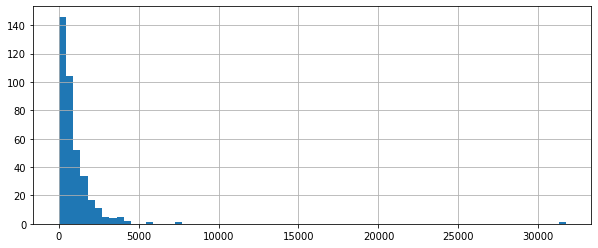

In [ ]:
plt.figure(figsize=(10,4))
fd['Total No of Ratings'].hist(bins=70)

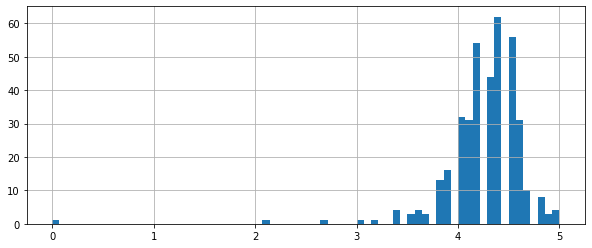

In [ ]:
plt.figure(figsize=(10,4))
fd['Rating'].hist(bins=70)

# ***lets create a better visualization with joint plot***

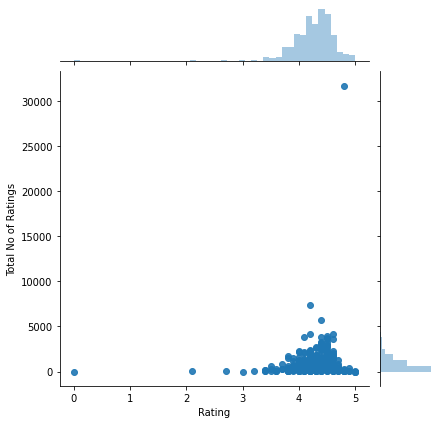

In [ ]:
sns.jointplot(x='Rating',y='Total No of Ratings',data=fd,alpha=0.9)

In [ ]:
fd

,Unnamed: 0,Name of Restaurent,Type of Cusine,Rating,Total No of Ratings,Classify,Cost,Dine_in_availability,Takeaway_type,Delivery_availability,Flexiability,Dine,Take,deli,Flex,Opening_time,Description of the Restaurent,Location and Address,Landmark,Current Status
0,0,Las Tortas Mexican,Restaurant,4.5,287,1,Average Cost,Dine-in,Takeaway,Delivery,Flexiable,1,1,1,1,11:30AM,No Description,Canvouver,3353 Cambie Street,Closed
1,1,The Story Cafe -,Restaurant,4.7,154,0,Average Cost,Dine-in,Takeaway,Delivery,Flexiable,1,1,1,1,9AM,No Description,Canvouver,2800 Sexsmith Road,Closed
2,2,Miku Vancouver,Sushi,4.6,4201,1,Expensive,DIne In Not Available,Take In Not Available,Dilivery Not Available,Not Flexiable,0,0,0,0,11:30AM,Sushi & sustainable seafood are served in a sophisticated setting with a patio & water views.,200 Granville St # 70 ú In the Granville Square,"Vancouver, BC, Canada",Closed
3,3,Blue Water Cafe,Seafood,4.6,1822,1,Too Expensive,Dine-in,Takeaway,Delivery,Flexiable,1,1,1,1,4:30PM,Destination in a heritage warehouse space offering sustainable seafood with innovative touches.,1095 Hamilton St ú In Urban Systems,"Vancouver, BC, Canada",Closed
4,4,Chambar Restaurant,Restaurant,4.4,2736,1,Expensive,Dine-in,Takeaway,Delivery,Flexiable,1,1,1,1,11:30AM,"Chic exposed-brick space serving creative Belgian cuisine & sustainable seafood, plus beer & wine.",568 Beatty St,"Vancouver, BC, Canada",Closed
5,5,Hawksworth Restaurant,Restaurant,4.4,907,1,Too Expensive,DIne In Not Available,Take In Not Available,Dilivery Not Available,Not Flexiable,0,0,0,0,11:30AM,Inventive Pacific Northwest cuisine & extensive wine list served in the Rosewood Hotel Georgia.,801 W Georgia St ú In the Rosewood Hotel Georgia,"Vancouver, BC, Canada",Closed
6,6,Forage,Pacific Northwest,4.5,1250,1,Average Cost,Dine-in,Takeaway,Dilivery Not Available,Flexiable,1,1,0,1,4PM,"Farm-to-table bistro presenting creative, area-sourced plates, plus local beer & wine on tap.",1300 Robson St,"Vancouver, BC, Canada",Closed
7,7,St Lawrence Restaurant,French,4.7,564,1,Expensive,DIne In Not Available,Take In Not Available,Dilivery Not Available,Not Flexiable,0,0,0,0,5PM,"Classic French dishes served for dinner in an intimate, casually elegant setting.",269 Powell St,"Vancouver, BC, Canada",Closed
8,8,Botanist,Pacific Northwest,4.5,729,1,Average Cost,DIne In Not Available,Take In Not Available,Dilivery Not Available,Not Flexiable,0,0,0,0,10AM,"Airy, high-end restaurant in the Fairmont Hotel offering modern Canadian cuisine, wine & cocktails.",Canvouver,1038 Canada Pl ú In the Fairmont Pacific Rim,Temporarily closed
9,9,Hy's Steakhouse & Cocktail Bar,Steak,4.5,1226,1,Too Expensive,DIne In Not Available,Take In Not Available,Dilivery Not Available,Not Flexiable,0,0,0,0,11:30AM,Long-time posh spot for Canadian steaks & cocktails in a traditional wood-paneled setting.,637 Hornby St ú Near the Vancouver Art Gallery,"Vancouver, BC, Canada",Closed


In [ ]:
fd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     383 non-null    int64  
 1   Name of Restaurent             383 non-null    object 
 2   Type of Cusine                 383 non-null    object 
 3   Rating                         383 non-null    float64
 4   Total No of Ratings            383 non-null    int64  
 5   Classify                       383 non-null    int64  
 6   Cost                           383 non-null    object 
 7   Dine_in_availability           383 non-null    object 
 8   Takeaway_type                  383 non-null    object 
 9   Delivery_availability          383 non-null    object 
 10  Flexiability                   383 non-null    object 
 11  Dine                           383 non-null    int64  
 12  Take                           383 non-null    int

In [ ]:
resmat=fd.pivot_table(index='Type of Cusine',columns='Name of Restaurent ',values='Rating')

In [ ]:
resmat.tail(20)

Name of Restaurent,1931 Gallery Bistro,33 Acres Brewing Company,49th Parallel Caf‚ & Lucky's Doughnuts - MAIN,A&W Canada,ABM Food Equipment - Restaurant Equipment & Supplies,AK's Just Bite Fresh,Absinthe Bistro,Afghan Horsemen Restaurant,Akbar's Own Indian Restaurant,Aladdin Caf‚,Aleph Eatery,Altitudes Bistro,Ancora Waterfront Dining and Patio - Ambleside,Ancora Waterfront Dining and Patio - False Creek,Anh and Chi,AnnaLena,Ashiana Tandoori,Ask For Luigi Restaurant,Atlas Steak + Fish,Au Comptoir,BA Restaurant Holdings Ltd.,Bacchus Restaurant & Lounge,Baghdad Cafe,Ballyhoo Public House,Bao Bei,Bar One,Basil Box,Bauhaus Restaurant,Bay Sushi Cafe Express,Bella Gelateria,Bellaggio Cafe,Best Neighbours Restaurant & Pizza House/ Johnny?s on Oak,BiBo Pizzeria con Cucina,Bibo Pizzeria,Bishop's,Bistro Verde,Black+Blue,Blue Water Cafe,Botanist,Boulevard Kitchen & Oyster Bar,...,"The Westin Bayshore, Vancouver",Thierry,Thomas Haas,Tojo's Restaurant,Tokyo Joe's Sushi in Vancouver,Top Of Vancouver Revolving Restaurant,Tractor Everyday Healthy Foods - Marine Building,Tractor Foods,Trattoria,Trees Organic Coffee,Trump International Hotel & Tower Vancouver,Twisted Fork Bistro,Umi Sushi Express,Unwind,Urban Sushi Cafe,Vancouver Convention Centre,Vancouver Foodie Tours,Vancouver International Airport,Vancouver Restaurant Brokers,Victoria Chinese Restaurant,Viet Sub Vietnamese Cuisine,Vij's,Vij's Rangoli,Vonns,West Oak,West Vancouver Centennial Seawalk,White Spot Dunsmuir,Wildebeest,Wildtale Yaletown,Yah Yah Ya Ramen Downtown,Yui Japanese Bistro,ZAC-ZAC Japanese Curry House,Zaatar w Zeit,Zakkushi Dining on Main,Zefferelli's,Zen Japanese Restaurant,Zocalo Modern Cantina,alphabet city,delhi6 Indian bistro,per se Social Corner
Type of Cusine,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Salad,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sandwich,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Seafood,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.6,4.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.6,NaN,4.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Shopping mall,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Small Plates,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
South Asian,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
South East Asian,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [ ]:
sim_to_Wildtale=resmat['Wildtale Yaletown']

In [ ]:
sim_to_Wildtale

Type of Cusine
 Sushi                          NaN 
Afghani                         NaN 
Airport                         NaN 
American                        NaN 
Asian Fusion                    NaN 
Bakery and Cake Shop            NaN 
Bar                             NaN 
Barbecue                        NaN 
Bistro                          NaN 
Breakfast                       NaN 
Brewery                         NaN 
Brunch                          NaN 
Burritos                        NaN 
Business broker                 NaN 
Cafe                            NaN 
Cambodian                       NaN 
Canadian                        NaN 
Cantonese                       NaN 
Chicken                         NaN 
Chinese                         NaN 
Chinese Noodles                 NaN 
Coffee shop                     NaN 
Commercial real estate agency   NaN 
Continental restaurant          NaN 
Convention center               NaN 
Corporate office                NaN 
Dessert                

In [ ]:
sim=resmat.corrwith(sim_to_Wildtale)

In [ ]:
sim

Name of Restaurent 
1931 Gallery Bistro                                                  NaN
33 Acres Brewing Company                                             NaN
49th Parallel Caf‚ & Lucky's Doughnuts - MAIN                        NaN
A&W Canada                                                           NaN
ABM Food Equipment - Restaurant Equipment & Supplies                 NaN
AK's Just Bite Fresh                                                 NaN
Absinthe Bistro                                                      NaN
Afghan Horsemen Restaurant                                           NaN
Akbar's Own Indian Restaurant                                        NaN
Aladdin Caf‚                                                         NaN
Aleph Eatery                                                         NaN
Altitudes Bistro                                                     NaN
Ancora Waterfront Dining and Patio - Ambleside                       NaN
Ancora Waterfront Dining and Pa

In [ ]:
fd['Type of Cusine'].unique()

array(['Restaurant', ' Sushi', 'Seafood', 'Pacific Northwest', 'French',
       'Steak', 'Chinese', 'Mediterranean', 'Vegetarian', 'Canadian',
       'German', 'Fusion restaurant', 'Cambodian', 'Diner', 'Fine Dining',
       'Italian', 'Brunch', 'Oyster Bar', 'Izakaya', 'European', 'Tuscan',
       'Continental restaurant', 'Japanese', 'Ramen', 'Thai', 'Pizza',
       'Asian Fusion', 'Indian', 'Small Plates', 'Takeout restaurant',
       'Korean', 'Mexican', 'Vietnamese', 'Chinese Noodles',
       'Latin American', 'Breakfast', 'Spanish', 'Sushi', 'Burritos',
       'Middle Eastern', 'Grill', 'Pho', 'Polynesian restaurant',
       'Qu‚b‚cois restaurant', 'Pan-Latin restaurant', 'Fast Food',
       'Yakiniku', 'Noodle Shop', 'Ethiopian', 'Dessert', 'Afghani',
       'Japanese steakhouse', 'South Asian', 'Health Food', 'Bistro',
       'Sandwich', 'Family-friendly', 'American', 'Hamburger', 'Barbecue',
       'Chicken', 'Persian', 'South East Asian', 'Tapas', 'Lebanese',
       'Hawaiian

# colobrative filtering using KNN based reccom_System

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
res=pd.read_csv("/content/res_dat.csv")

In [ ]:
rev=pd.read_csv("/content/res_rev_data.csv")

In [ ]:
res.head()

,index,Name,Price,Price_l,Price_lo,Price_hi,Price_h,Type,Timing,Address,Coordinates,Landmark,Site,Phone number
0,0,Tuc Craft Kitchen,$$,4.0,4,2,2.0,"Canadian (New), Comfort Food, Bars","[{'Mon': 'Closed'}, {'Tue': '5:00 pm - 9:00 pm'}, {'Wed': '5:00 pm - 9:00 pm'}, {'Thu': '5:00 pm - 9:00 pm'}, {'Fri': '5:00 pm - 9:00 pm'}, {'Sat': '5:00 pm - 9:00 pm'}, {'Sun': 'Closed'}]","60 W Cordova StreetVancouver, BC V6B 1C9Canada","['49.2827049205371', '-123.106144577322']","Gastown, Downtown Eastside",https://tuccraftkitchen.com,(604) 559-8999
1,1,The Flying Pig - Yaletown,$$,4.0,4,2,2.0,"Canadian (New), Seafood","[{'Mon': '3:00 pm - 11:00 pm'}, {'Tue': '3:00 pm - 11:00 pm'}, {'Wed': '3:00 pm - 11:00 pm'}, {'Thu': '3:00 pm - 11:00 pm'}, {'Fri': '3:00 pm - 12:00 am'}, {'Sat': '12:00 pm - 12:00 am'}, {'Sun': '12:00 pm - 10:00 pm'}]","1168 Hamilton StreetUnit 104Vancouver, BC V6B 2S2Canada","['49.2751066', '-123.1220961']","Yaletown, Downtown",https://theflyingpigvan.com,(604) 568-1344
2,2,Fable,$$,4.0,4,2,2.0,Canadian (New),"[{'Mon': '5:00 pm - 10:00 pm'}, {'Tue': '5:00 pm - 10:00 pm'}, {'Wed': '5:00 pm - 10:00 pm'}, {'Thu': '5:00 pm - 10:00 pm'}, {'Fri': '5:00 pm - 10:00 pm'}, {'Sat': '10:00 am - 3:00 pm5:00 pm - 10:00 pm'}, {'Sun': '10:00 am - 3:00 pm'}]","1944 W 4th AvenueVancouver, BC V6J 1M5Canada","['49.2679331', '-123.149019']",Unknown,Unknown,Unknown
3,3,Phnom Penh,$$,4.0,4,2,2.0,"Cambodian, Vietnamese","[{'Mon': '11:00 am - 7:00 pm'}, {'Tue': '11:00 am - 7:00 pm'}, {'Wed': '11:00 am - 7:00 pm'}, {'Thu': '11:00 am - 7:00 pm'}, {'Fri': '11:00 am - 7:00 pm'}, {'Sat': '11:00 am - 7:00 pm'}, {'Sun': 'Closed'}]","244 E Georgia StreetVancouver, BC V6A 1Z7Canada","['49.278431', '-123.098205']",Unknown,Unknown,Unknown
4,4,The Flying Pig - Gastown,$$,4.0,4,2,2.0,"Canadian (New), Seafood","[{'Mon': 'Closed'}, {'Tue': 'Closed'}, {'Wed': '3:00 pm - 11:00 pm'}, {'Thu': '3:00 pm - 11:00 pm'}, {'Fri': '12:00 pm - 12:00 am'}, {'Sat': '12:00 pm - 12:00 am'}, {'Sun': '12:00 pm - 10:00 pm'}]","102 Water StreetVancouver, BC V6B 2K8Canada","['49.2837849', '-123.1066087']","Gastown, Downtown",https://theflyingpigvan.com,(604) 559-7968


In [ ]:
rev.head()

,Unnamed: 0,0,1,2,3
0,0,Tuc Craft Kitchen,5,"This place is awesome - great delicious food, balanced cocktails, warm relaxed ambiance. Perfect for a date night or a get together with friends. It's one of our go-to spots in town, can't recommend it enough!",Tyler S.
1,1,Tuc Craft Kitchen,5,"This was my first time at Tuc. I went there for Valentine's Day with my friend. The happy hour (drink menu) was pretty good. They offered one glass of wine for $5. \n\nWe ordered shrimps, mussels and eggs with crispy bacon. I liked the eggs but every other thing wasn't that great. I was unable to finish my meal. \n\nI hear they make a pretty good brunch though. I would probably try the chicken and waffles next time.\n\nBut the dinner menu just didn't do it for me.",Yami E.
2,2,Tuc Craft Kitchen,5,"On our trip to Vancouver we wanted to try this place out for dinner one night. Luckily they are open late on the weekends as our drive up from Seattle got us in a bit tardy for the usual dinner hour. The inside has a rustic look with wood paneling, rope and iron lanterns, and minimalist decorations. The low lightning gave off a nice intimate atmosphere for a late dinner. \n\nOur server was very friendly and helpful in ordering gluten free for me. There are limited items on the menu that can accommodate a gf diet, so better not be picky! We waited a pretty long time for food but were happy that our server did a good job keeping our drinks refreshed while we waited. We started with the ploughman's board which had some various cheeses, cured meats and other accoutrements. Overall it was pretty tasty, but everything was very salty, would have loved some fruit on there to change up the flavor profile a bit. The husband enjoyed his cup of french onion soup which had a nice crispy top. He also enjoyed the mac n cheese. I had the chicken kabob (only gf entree item) but was not really impressed by it or the accompanying salad. \n\nOverall it seemed like a pretty solid place and a great spot to hang out late if in the area. The husband enjoyed his meal a bit more than i did, but as a whole it seemed like a solid place.",Elisabeth P.
3,3,Tuc Craft Kitchen,5,"We went to visit Tuc for dine out 2020, to try their dinner menu. \n\nI started with a pear iced tea, which was pretty good although the pear purée or syrup settled to the bottom and made it so the drink got sweeter the more you drank. We ordered the salted courgettes with cheese, and upgrade to the pork belly crackling. Seriously, best upgrade I've ever paid for. The crackling was charred on the outside and so fatty and flavourful on the inside . The reduction went with it so nicely, and you get a surprising portion. (I actually had to take some of my main home because it was so much). Next up came Togarashi Ahi Tuna and Ayano's chicken Karaage. Both dishes were fantastic, with the richness of the deep fried meat and fish balanced out by noodles and greens. The dessert was a lemon English pudding, which turned out to be a denser lemon cake in a jar with whipped cream and strawberries.",Shawna L.
4,4,Tuc Craft Kitchen,5,"I should say up front that this is a dinner review, and after this meal I'll be coming back for brunch. Tuc Craft Kitchen was a good spot for modern Canadian food with a solid selection of craft beers.\n\n[Dishes]\nPork Belly Crackling - My God this was good. If you eat pork and like bursts of flavour, do yourself a favour and order this. \n\nBeef al Forno - the beef was nice and tender, the mashed potatoes deliciously creamy, and the goat cheese balanced it all out nicely. The red wine and chocolate sauce was icing on the proverbial cake.\n\n\nTogarashi Ahi Tuna - as good as the Beef al Forno was, this was the better dish. The flavours of the tuna, turmeric, and garlic mixed together in the rice noodles to create an interesting dish. Add the lightness of the Ahi tuna and you get the best dish of the night. \n\n[Service/Atmosphere]\nService was friendly and quick. The atmosphere was lively

In [ ]:
rev=rev.rename(columns={'Unnamed: 0':'index','0':'Name','1':'rating','2':'review','3':'Author'})

In [ ]:
rev

,index,Name,rating,review,Author
0,0,Tuc Craft Kitchen,5,"This place is awesome - great delicious food, balanced cocktails, warm relaxed ambiance. Perfect for a date night or a get together with friends. It's one of our go-to spots in town, can't recommend it enough!",Tyler S.
1,1,Tuc Craft Kitchen,5,"This was my first time at Tuc. I went there for Valentine's Day with my friend. The happy hour (drink menu) was pretty good. They offered one glass of wine for $5. \n\nWe ordered shrimps, mussels and eggs with crispy bacon. I liked the eggs but every other thing wasn't that great. I was unable to finish my meal. \n\nI hear they make a pretty good brunch though. I would probably try the chicken and waffles next time.\n\nBut the dinner menu just didn't do it for me.",Yami E.
2,2,Tuc Craft Kitchen,5,"On our trip to Vancouver we wanted to try this place out for dinner one night. Luckily they are open late on the weekends as our drive up from Seattle got us in a bit tardy for the usual dinner hour. The inside has a rustic look with wood paneling, rope and iron lanterns, and minimalist decorations. The low lightning gave off a nice intimate atmosphere for a late dinner. \n\nOur server was very friendly and helpful in ordering gluten free for me. There are limited items on the menu that can accommodate a gf diet, so better not be picky! We waited a pretty long time for food but were happy that our server did a good job keeping our drinks refreshed while we waited. We started with the ploughman's board which had some various cheeses, cured meats and other accoutrements. Overall it was pretty tasty, but everything was very salty, would have loved some fruit on there to change up the flavor profile a bit. The husband enjoyed his cup of french onion soup which had a nice crispy top. He also enjoyed the mac n cheese. I had the chicken kabob (only gf entree item) but was not really impressed by it or the accompanying salad. \n\nOverall it seemed like a pretty solid place and a great spot to hang out late if in the area. The husband enjoyed his meal a bit more than i did, but as a whole it seemed like a solid place.",Elisabeth P.
3,3,Tuc Craft Kitchen,5,"We went to visit Tuc for dine out 2020, to try their dinner menu. \n\nI started with a pear iced tea, which was pretty good although the pear purée or syrup settled to the bottom and made it so the drink got sweeter the more you drank. We ordered the salted courgettes with cheese, and upgrade to the pork belly crackling. Seriously, best upgrade I've ever paid for. The crackling was charred on the outside and so fatty and flavourful on the inside . The reduction went with it so nicely, and you get a surprising portion. (I actually had to take some of my main home because it was so much). Next up came Togarashi Ahi Tuna and Ayano's chicken Karaage. Both dishes were fantastic, with the richness of the deep fried meat and fish balanced out by noodles and greens. The dessert was a lemon English pudding, which turned out to be a denser lemon cake in a jar with whipped cream and strawberries.",Shawna L.
4,4,Tuc Craft Kitchen,5,"I should say up front that this is a dinner review, and after this meal I'll be coming back for brunch. Tuc Craft Kitchen was a good spot for modern Canadian food with a solid selection of craft beers.\n\n[Dishes]\nPork Belly Crackling - My God this was good. If you eat pork and like bursts of flavour, do yourself a favour and order this. \n\nBeef al Forno - the beef was nice and tender, the mashed potatoes deliciously creamy, and the goat cheese balanced it all out nicely. The red wine and chocolate sauce was icing on the proverbial cake.\n\n\nTogarashi Ahi Tuna - as good as the Beef al Forno was, this was the better dish. The flavours of the tuna, turmeric, and garlic mixed together in the rice noodles to create an interesting dish. Add the lightness of the Ahi tuna and you get the best dish of the night. \n\n[Service/Atmosphere]\nService was friendly and quick. The atmosphe

In [ ]:
fin= pd.merge(rev,res,on='Name')
fin.head()

,index_x,Name,rating,review,Author,index_y,Price,Price_l,Price_lo,Price_hi,Price_h,Type,Timing,Address,Coordinates,Landmark,Site,Phone number
0,0,Tuc Craft Kitchen,5,"This place is awesome - great delicious food, balanced cocktails, warm relaxed ambiance. Perfect for a date night or a get together with friends. It's one of our go-to spots in town, can't recommend it enough!",Tyler S.,0,$$,4.0,4,2,2.0,"Canadian (New), Comfort Food, Bars","[{'Mon': 'Closed'}, {'Tue': '5:00 pm - 9:00 pm'}, {'Wed': '5:00 pm - 9:00 pm'}, {'Thu': '5:00 pm - 9:00 pm'}, {'Fri': '5:00 pm - 9:00 pm'}, {'Sat': '5:00 pm - 9:00 pm'}, {'Sun': 'Closed'}]","60 W Cordova StreetVancouver, BC V6B 1C9Canada","['49.2827049205371', '-123.106144577322']","Gastown, Downtown Eastside",https://tuccraftkitchen.com,(604) 559-8999
1,1,Tuc Craft Kitchen,5,"This was my first time at Tuc. I went there for Valentine's Day with my friend. The happy hour (drink menu) was pretty good. They offered one glass of wine for $5. \n\nWe ordered shrimps, mussels and eggs with crispy bacon. I liked the eggs but every other thing wasn't that great. I was unable to finish my meal. \n\nI hear they make a pretty good brunch though. I would probably try the chicken and waffles next time.\n\nBut the dinner menu just didn't do it for me.",Yami E.,0,$$,4.0,4,2,2.0,"Canadian (New), Comfort Food, Bars","[{'Mon': 'Closed'}, {'Tue': '5:00 pm - 9:00 pm'}, {'Wed': '5:00 pm - 9:00 pm'}, {'Thu': '5:00 pm - 9:00 pm'}, {'Fri': '5:00 pm - 9:00 pm'}, {'Sat': '5:00 pm - 9:00 pm'}, {'Sun': 'Closed'}]","60 W Cordova StreetVancouver, BC V6B 1C9Canada","['49.2827049205371', '-123.106144577322']","Gastown, Downtown Eastside",https://tuccraftkitchen.com,(604) 559-8999
2,2,Tuc Craft Kitchen,5,"On our trip to Vancouver we wanted to try this place out for dinner one night. Luckily they are open late on the weekends as our drive up from Seattle got us in a bit tardy for the usual dinner hour. The inside has a rustic look with wood paneling, rope and iron lanterns, and minimalist decorations. The low lightning gave off a nice intimate atmosphere for a late dinner. \n\nOur server was very friendly and helpful in ordering gluten free for me. There are limited items on the menu that can accommodate a gf diet, so better not be picky! We waited a pretty long time for food but were happy that our server did a good job keeping our drinks refreshed while we waited. We started with the ploughman's board which had some various cheeses, cured meats and other accoutrements. Overall it was pretty tasty, but everything was very salty, would have loved some fruit on there to change up the flavor profile a bit. The husband enjoyed his cup of french onion soup which had a nice crispy top. He also enjoyed the mac n cheese. I had the chicken kabob (only gf entree item) but was not really impressed by it or the accompanying salad. \n\nOverall it seemed like a pretty solid place and a great spot to hang out late if in the area. The husband enjoyed his meal a bit more than i did, but as a whole it seemed like a solid place.",Elisabeth P.,0,$$,4.0,4,2,2.0,"Canadian (New), Comfort Food, Bars","[{'Mon': 'Closed'}, {'Tue': '5:00 pm - 9:00 pm'}, {'Wed': '5:00 pm - 9:00 pm'}, {'Thu': '5:00 pm - 9:00 pm'}, {'Fri': '5:00 pm - 9:00 pm'}, {'Sat': '5:00 pm - 9:00 pm'}, {'Sun': 'Closed'}]","60 W Cordova StreetVancouver, BC V6B 1C9Canada","['49.2827049205371', '-123.106144577322']","Gastown, Downtown Eastside",https://tuccraftkitchen.com,(604) 559-8999
3,3,Tuc Craft Kitchen,5,"We went to visit Tuc for dine out 2020, to try their dinner menu. \n\nI started with a pear iced tea, which was pretty good although the pear purée or syrup settled to the bottom and made it so the drink got sweeter the more you drank. We ordered the salted courgettes with cheese, and upgrade to the pork belly crackling. Seriously, best upgrade I've ever paid for. The crackling was charred on the outside and so fatty and flavourful on the inside . The reduction went with it so nic

In [ ]:
fin.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58329 entries, 0 to 58328
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   index_x       58329 non-null  int64  
 1   Name          58329 non-null  object 
 2   rating        58329 non-null  int64  
 3   review        58329 non-null  object 
 4   Author        58329 non-null  object 
 5   index_y       58329 non-null  int64  
 6   Price         57059 non-null  object 
 7   Price_l       57059 non-null  float64
 8   Price_lo      58329 non-null  int64  
 9   Price_hi      58329 non-null  int64  
 10  Price_h       57059 non-null  float64
 11  Type          58329 non-null  object 
 12  Timing        58329 non-null  object 
 13  Address       58329 non-null  object 
 14  Coordinates   58329 non-null  object 
 15  Landmark      58329 non-null  object 
 16  Site          58329 non-null  object 
 17  Phone number  58060 non-null  object 
dtypes: float64(2), int64(5), o

In [ ]:
fina=fin[['Name','rating','Author','Type']]

In [ ]:
fina.head(5)

,Name,rating,Author,Type
0,Tuc Craft Kitchen,5,Tyler S.,"Canadian (New), Comfort Food, Bars"
1,Tuc Craft Kitchen,5,Yami E.,"Canadian (New), Comfort Food, Bars"
2,Tuc Craft Kitchen,5,Elisabeth P.,"Canadian (New), Comfort Food, Bars"
3,Tuc Craft Kitchen,5,Shawna L.,"Canadian (New), Comfort Food, Bars"
4,Tuc Craft Kitchen,5,Jason C.,"Canadian (New), Comfort Food, Bars"


In [ ]:
combine_res_rating = fin.dropna(axis = 0, subset = ['Name'])
res_ratingCount = (combine_res_rating.
     groupby(by = ['Name'])['rating'].
     count().
     reset_index().
     rename(columns = {'rating': 'totalRatingCount'})
     [['Name', 'totalRatingCount']]
    )
res_ratingCount.head()

,Name,totalRatingCount
0,6 Degrees Eatery,175
1,ARC Restaurant,105
2,Absinthe Bistro,125
3,Afghan Horsemen Restaurant,209
4,Aleph Eatery,54


In [ ]:
res

,index,Name,Price,Price_l,Price_lo,Price_hi,Price_h,Type,Timing,Address,Coordinates,Landmark,Site,Phone number
0,0,Tuc Craft Kitchen,$$,4.0,4,2,2.0,"Canadian (New), Comfort Food, Bars","[{'Mon': 'Closed'}, {'Tue': '5:00 pm - 9:00 pm'}, {'Wed': '5:00 pm - 9:00 pm'}, {'Thu': '5:00 pm - 9:00 pm'}, {'Fri': '5:00 pm - 9:00 pm'}, {'Sat': '5:00 pm - 9:00 pm'}, {'Sun': 'Closed'}]","60 W Cordova StreetVancouver, BC V6B 1C9Canada","['49.2827049205371', '-123.106144577322']","Gastown, Downtown Eastside",https://tuccraftkitchen.com,(604) 559-8999
1,1,The Flying Pig - Yaletown,$$,4.0,4,2,2.0,"Canadian (New), Seafood","[{'Mon': '3:00 pm - 11:00 pm'}, {'Tue': '3:00 pm - 11:00 pm'}, {'Wed': '3:00 pm - 11:00 pm'}, {'Thu': '3:00 pm - 11:00 pm'}, {'Fri': '3:00 pm - 12:00 am'}, {'Sat': '12:00 pm - 12:00 am'}, {'Sun': '12:00 pm - 10:00 pm'}]","1168 Hamilton StreetUnit 104Vancouver, BC V6B 2S2Canada","['49.2751066', '-123.1220961']","Yaletown, Downtown",https://theflyingpigvan.com,(604) 568-1344
2,2,Fable,$$,4.0,4,2,2.0,Canadian (New),"[{'Mon': '5:00 pm - 10:00 pm'}, {'Tue': '5:00 pm - 10:00 pm'}, {'Wed': '5:00 pm - 10:00 pm'}, {'Thu': '5:00 pm - 10:00 pm'}, {'Fri': '5:00 pm - 10:00 pm'}, {'Sat': '10:00 am - 3:00 pm5:00 pm - 10:00 pm'}, {'Sun': '10:00 am - 3:00 pm'}]","1944 W 4th AvenueVancouver, BC V6J 1M5Canada","['49.2679331', '-123.149019']",Unknown,Unknown,Unknown
3,3,Phnom Penh,$$,4.0,4,2,2.0,"Cambodian, Vietnamese","[{'Mon': '11:00 am - 7:00 pm'}, {'Tue': '11:00 am - 7:00 pm'}, {'Wed': '11:00 am - 7:00 pm'}, {'Thu': '11:00 am - 7:00 pm'}, {'Fri': '11:00 am - 7:00 pm'}, {'Sat': '11:00 am - 7:00 pm'}, {'Sun': 'Closed'}]","244 E Georgia StreetVancouver, BC V6A 1Z7Canada","['49.278431', '-123.098205']",Unknown,Unknown,Unknown
4,4,The Flying Pig - Gastown,$$,4.0,4,2,2.0,"Canadian (New), Seafood","[{'Mon': 'Closed'}, {'Tue': 'Closed'}, {'Wed': '3:00 pm - 11:00 pm'}, {'Thu': '3:00 pm - 11:00 pm'}, {'Fri': '12:00 pm - 12:00 am'}, {'Sat': '12:00 pm - 12:00 am'}, {'Sun': '12:00 pm - 10:00 pm'}]","102 Water StreetVancouver, BC V6B 2K8Canada","['49.2837849', '-123.1066087']","Gastown, Downtown",https://theflyingpigvan.com,(604) 559-7968
5,5,Guu with Garlic,$$,4.0,4,2,2.0,"Japanese, Tapas Bars","[{'Mon': '11:30 am - 10:00 pm'}, {'Tue': '11:30 am - 10:00 pm'}, {'Wed': '11:30 am - 10:00 pm'}, {'Thu': '11:30 am - 10:00 pm'}, {'Fri': '11:30 am - 12:00 am'}, {'Sat': '11:30 am - 12:00 am'}, {'Sun': '11:30 am - 10:00 pm'}]","1698 Robson StreetVancouver, BC V6G 1C7Canada","['49.2902019', '-123.133953']",West End,https://guu-izakaya.com,(604) 685-8678
6,6,Lunch Lady,NaN,NaN,3,3,NaN,Vietnamese,"[{'Mon': 'Closed'}, {'Tue': '11:00 am - 3:00 pm5:00 pm - 9:00 pm'}, {'Wed': '11:00 am - 3:00 pm5:00 pm - 9:00 pm'}, {'Thu': '11:00 am - 3:00 pm5:00 pm - 9:00 pm'}, {'Fri': '11:00 am - 3:00 pm5:00 pm - 11:00 pm'}, {'Sat': '11:00 am - 3:00 pm5:00 pm - 11:00 pm'}, {'Sun': '11:00 am - 3:00 pm5:00 pm - 9:00 pm'}]","1046 Commercial DriveVancouver, BC V5L 3W9Canada","['49.2749731', '-123.0693852']","Grandview-Woodlands, The Drive",https://thelunchlady.com,(604) 559-5938
7,7,Dinesty Dumpling House,$$,4.0,4,2,2.0,"Chinese, Bubble Tea, Dumplings","[{'Mon': '11:00 am - 2:15 pm5:00 pm - 8:30 pm'}, {'Tue': '11:00 am - 2:15 pm5:00 pm - 8:30 pm'}, {'Wed': '11:00 am - 2:15 pm5:00 pm - 8:30 pm'}, {'Thu': '11:00 am - 2:15 pm5:00 pm - 8:30 pm'}, {'Fri': '11:00 am - 2:15 pm5:00 pm - 9:00 pm'}, {'Sat': '11:00 am - 2:15 pm5:00 pm - 9:00 pm'}, {'Sun': '11:00 am - 2:15 pm5:00 pm - 8:30 pm'}]","1719 Robson StreetVancouver, BC V6G 1C8Canada","['49.2908176', '-123.1343912']",Unknown,Unknown,Unknown
8,8,Bonjour Vietnam Bistro,NaN,NaN,3,3,NaN,Vietnamese,"[{'Mon': 'Closed'}, {'Tue': '5:00 pm - 9:30 pm'}, {'Wed': '5:00 pm - 9:30 pm'}, {'Thu': '5:00 pm - 9:30 pm'}, {'Fri': '5:00 pm - 10:30 pm'}, {'Sat': '5:00 pm - 10:30 pm'}, {'Sun': '5:00 pm - 9:30 pm'}]","3944 Fraser StreetVancouver, BC V5V 4E4Canada","['49.249668', '-123.0899331']","Riley Park, Kensington-Cedar Cottage",https://bonjourvietnambistro.com

In [ ]:
rating_with_totalRatingCount = combine_res_rating.merge(res_ratingCount, left_on = 'Name', right_on = 'Name', how = 'left')
rating_with_totalRatingCount.head()

,index_x,Name,rating,review,Author,index_y,Price,Price_l,Price_lo,Price_hi,Price_h,Type,Timing,Address,Coordinates,Landmark,Site,Phone number,totalRatingCount
0,0,Tuc Craft Kitchen,5,"This place is awesome - great delicious food, balanced cocktails, warm relaxed ambiance. Perfect for a date night or a get together with friends. It's one of our go-to spots in town, can't recommend it enough!",Tyler S.,0,$$,4.0,4,2,2.0,"Canadian (New), Comfort Food, Bars","[{'Mon': 'Closed'}, {'Tue': '5:00 pm - 9:00 pm'}, {'Wed': '5:00 pm - 9:00 pm'}, {'Thu': '5:00 pm - 9:00 pm'}, {'Fri': '5:00 pm - 9:00 pm'}, {'Sat': '5:00 pm - 9:00 pm'}, {'Sun': 'Closed'}]","60 W Cordova StreetVancouver, BC V6B 1C9Canada","['49.2827049205371', '-123.106144577322']","Gastown, Downtown Eastside",https://tuccraftkitchen.com,(604) 559-8999,946
1,1,Tuc Craft Kitchen,5,"This was my first time at Tuc. I went there for Valentine's Day with my friend. The happy hour (drink menu) was pretty good. They offered one glass of wine for $5. \n\nWe ordered shrimps, mussels and eggs with crispy bacon. I liked the eggs but every other thing wasn't that great. I was unable to finish my meal. \n\nI hear they make a pretty good brunch though. I would probably try the chicken and waffles next time.\n\nBut the dinner menu just didn't do it for me.",Yami E.,0,$$,4.0,4,2,2.0,"Canadian (New), Comfort Food, Bars","[{'Mon': 'Closed'}, {'Tue': '5:00 pm - 9:00 pm'}, {'Wed': '5:00 pm - 9:00 pm'}, {'Thu': '5:00 pm - 9:00 pm'}, {'Fri': '5:00 pm - 9:00 pm'}, {'Sat': '5:00 pm - 9:00 pm'}, {'Sun': 'Closed'}]","60 W Cordova StreetVancouver, BC V6B 1C9Canada","['49.2827049205371', '-123.106144577322']","Gastown, Downtown Eastside",https://tuccraftkitchen.com,(604) 559-8999,946
2,2,Tuc Craft Kitchen,5,"On our trip to Vancouver we wanted to try this place out for dinner one night. Luckily they are open late on the weekends as our drive up from Seattle got us in a bit tardy for the usual dinner hour. The inside has a rustic look with wood paneling, rope and iron lanterns, and minimalist decorations. The low lightning gave off a nice intimate atmosphere for a late dinner. \n\nOur server was very friendly and helpful in ordering gluten free for me. There are limited items on the menu that can accommodate a gf diet, so better not be picky! We waited a pretty long time for food but were happy that our server did a good job keeping our drinks refreshed while we waited. We started with the ploughman's board which had some various cheeses, cured meats and other accoutrements. Overall it was pretty tasty, but everything was very salty, would have loved some fruit on there to change up the flavor profile a bit. The husband enjoyed his cup of french onion soup which had a nice crispy top. He also enjoyed the mac n cheese. I had the chicken kabob (only gf entree item) but was not really impressed by it or the accompanying salad. \n\nOverall it seemed like a pretty solid place and a great spot to hang out late if in the area. The husband enjoyed his meal a bit more than i did, but as a whole it seemed like a solid place.",Elisabeth P.,0,$$,4.0,4,2,2.0,"Canadian (New), Comfort Food, Bars","[{'Mon': 'Closed'}, {'Tue': '5:00 pm - 9:00 pm'}, {'Wed': '5:00 pm - 9:00 pm'}, {'Thu': '5:00 pm - 9:00 pm'}, {'Fri': '5:00 pm - 9:00 pm'}, {'Sat': '5:00 pm - 9:00 pm'}, {'Sun': 'Closed'}]","60 W Cordova StreetVancouver, BC V6B 1C9Canada","['49.2827049205371', '-123.106144577322']","Gastown, Downtown Eastside",https://tuccraftkitchen.com,(604) 559-8999,946
3,3,Tuc Craft Kitchen,5,"We went to visit Tuc for dine out 2020, to try their dinner menu. \n\nI started with a pear iced tea, which was pretty good although the pear purée or syrup settled to the bottom and made it so the drink got sweeter the more you drank. We ordered the salted courgettes with cheese, and upgrade to the pork belly crackling. Seriously, best upgrade I've ever paid for. The crackling was charred on the outside and so fatty and flavourful on the inside . The 

In [ ]:
rating_with_totalRatingCount.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58329 entries, 0 to 58328
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   index_x           58329 non-null  int64  
 1   Name              58329 non-null  object 
 2   rating            58329 non-null  int64  
 3   review            58329 non-null  object 
 4   Author            58329 non-null  object 
 5   index_y           58329 non-null  int64  
 6   Price             57059 non-null  object 
 7   Price_l           57059 non-null  float64
 8   Price_lo          58329 non-null  int64  
 9   Price_hi          58329 non-null  int64  
 10  Price_h           57059 non-null  float64
 11  Type              58329 non-null  object 
 12  Timing            58329 non-null  object 
 13  Address           58329 non-null  object 
 14  Coordinates       58329 non-null  object 
 15  Landmark          58329 non-null  object 
 16  Site              58329 non-null  object

In [ ]:
df=rating_with_totalRatingCount[['Author','Name','rating','totalRatingCount']]

In [ ]:
df.head()

,Author,Name,rating,totalRatingCount
0,Tyler S.,Tuc Craft Kitchen,5,946
1,Yami E.,Tuc Craft Kitchen,5,946
2,Elisabeth P.,Tuc Craft Kitchen,5,946
3,Shawna L.,Tuc Craft Kitchen,5,946
4,Jason C.,Tuc Craft Kitchen,5,946


In [ ]:
df.describe()

,rating,totalRatingCount
count,58329.0,58329.000000
mean,5.0,611.090281
std,0.0,505.258238
min,5.0,1.000000
25%,5.0,258.000000
50%,5.0,464.000000
75%,5.0,828.000000
max,5.0,2275.000000


In [ ]:
res_ratingCount.head(65)

,Name,totalRatingCount
0,6 Degrees Eatery,175
1,ARC Restaurant,105
2,Absinthe Bistro,125
3,Afghan Horsemen Restaurant,209
4,Aleph Eatery,54
5,Alibi Room,535
6,Amay's House,166
7,Anh and Chi,445
8,Anita's Kitchen,10
9,AnnaLena,294


In [ ]:
popularity_threshold = 20
rating_popular_res= df.query('totalRatingCount >= @popularity_threshold')
rating_popular_res.head()

,Author,Name,rating,totalRatingCount
0,Tyler S.,Tuc Craft Kitchen,5,946
1,Yami E.,Tuc Craft Kitchen,5,946
2,Elisabeth P.,Tuc Craft Kitchen,5,946
3,Shawna L.,Tuc Craft Kitchen,5,946
4,Jason C.,Tuc Craft Kitchen,5,946


In [ ]:
rating_popular_res.shape

(57795, 4)

# **Create a pivot table**

In [ ]:
res_features_df=rating_popular_res.pivot_table(index='Name',columns='Author',values='rating').fillna(0)
res_features_df.head(60)

Author,#NAME?,'Matt D.,. . ..,0 L.,100Foodie W.,28Daves L.,A A.,A B.,A C.,A D.,A E.,A F.,A Famous D.,A G.,A H.,A J.,A K.,A L.,A M.,A N.,A O.,A P.,A R.,A S.,A T.,A V.,A W.,A X.,A Y.,A. A.,A. B.,A. D.,A. L.,A. M.,A. T.,A. V.,A. V. J.,A. Y. M.,A.B M.,A.C. H.,...,tony p.,tracy m.,trish m.,v l.,v m.,v. a.,valerie v.,vandana m.,veena n.,veronica a.,victoria b.,violet s.,walter y.,wanderlust c.,wasabiroll w.,webster l.,xx u.,yael w.,ymcopeland C.,yu K.,zoi h.,zorana k.,Áki J.,Ásrún J.,Ãnon S.,Ărtem K.,亦,匿名,啟轩,德華,心妍,志嘉,恩蝶,有機,李,欣绿,潇,琪,瑜,현섭
Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
6 Degrees Eatery,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ARC Restaurant,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Absinthe Bistro,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Afghan Horsemen Restaurant,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Aleph Eatery,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Alibi Room,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Amay's House,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Anh and Chi,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AnnaLena,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
from scipy.sparse import csr_matrix

res_features_df_matrix = csr_matrix(res_features_df.values)

from sklearn.neighbors import NearestNeighbors


model_knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
model_knn.fit(res_features_df_matrix)

NearestNeighbors(algorithm='brute', leaf_size=30, metric='cosine',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

In [ ]:
res_features_df.shape

(207, 19359)

In [ ]:
query_index = np.random.choice(res_features_df.shape[0])
print(query_index)
distances, indices = model_knn.kneighbors(res_features_df.iloc[query_index,:].values.reshape(1, -1), n_neighbors = 6)

184


In [ ]:
res_features_df.head()

Author,#NAME?,'Matt D.,. . ..,0 L.,100Foodie W.,28Daves L.,A A.,A B.,A C.,A D.,A E.,A F.,A Famous D.,A G.,A H.,A J.,A K.,A L.,A M.,A N.,A O.,A P.,A R.,A S.,A T.,A V.,A W.,A X.,A Y.,A. A.,A. B.,A. D.,A. L.,A. M.,A. T.,A. V.,A. V. J.,A. Y. M.,A.B M.,A.C. H.,...,tony p.,tracy m.,trish m.,v l.,v m.,v. a.,valerie v.,vandana m.,veena n.,veronica a.,victoria b.,violet s.,walter y.,wanderlust c.,wasabiroll w.,webster l.,xx u.,yael w.,ymcopeland C.,yu K.,zoi h.,zorana k.,Áki J.,Ásrún J.,Ãnon S.,Ărtem K.,亦,匿名,啟轩,德華,心妍,志嘉,恩蝶,有機,李,欣绿,潇,琪,瑜,현섭
Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
6 Degrees Eatery,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ARC Restaurant,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Absinthe Bistro,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Afghan Horsemen Restaurant,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Aleph Eatery,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:


for i in range(0, len(distances.flatten())):
    if i == 0:
        print('Recommendations for {0}:\n'.format(res_features_df.index[query_index]))
    else:
        print('{0}: {1}, with distance of {2}:'.format(i, res_features_df.index[indices.flatten()[i]], distances.flatten()[i]))



Recommendations for The Mexican Antojitos Y Cantina:

1: The Templeton, with distance of 0.9147717085711538:
2: The Flying Pig - Yaletown, with distance of 0.9173245343730294:
3: Tuc Craft Kitchen, with distance of 0.9183298832190774:
4: Sal y Limón, with distance of 0.918712900080246:
5: Twisted Fork, with distance of 0.9192248584995973:
